# Antes de empezar :
   - Estos ejercicios están relacionados con las lecciones Subconjunto y Estadísticas descriptivas.
   - Tenga en cuenta que necesitará utilizar algunas de las funciones que aprendió en las lecciones anteriores.
   - Todos los conjuntos de datos se proporcionan en la carpeta `your-code` de este laboratorio.
   - Elabora tus códigos y resultados tanto como puedas.
   - Esfuérzate al máximo para responder a las preguntas y completar las tareas y, sobre todo, ¡¡¡disfruta del proceso!!!

#### Importa todas las librerías necesarias

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Desafío 1

#### En este reto utilizaremos el archivo `Temp_States.csv`. 

#### Primero impórtalo en un marco de datos llamado `temp`.

In [7]:
df_temp = pd.read_csv("./Temp_States.csv")
df_temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Print `temp`

In [9]:
df_temp["Temperature"]

0    19.444444
1     9.444444
2     3.333333
3    17.222222
4    14.444444
5    22.222222
6    20.000000
Name: Temperature, dtype: float64

#### Explore los tipos de datos del marco de datos Temp. ¿Qué tipo de datos tenemos? Comenta tu resultado.

In [11]:
df_temp["Temperature"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7 entries, 0 to 6
Series name: Temperature
Non-Null Count  Dtype  
--------------  -----  
7 non-null      float64
dtypes: float64(1)
memory usage: 184.0 bytes


Hay 7 datos. Todos son tipo float64

#### Selecciona las filas en las que el estado es New York

In [62]:
df_ny = df_temp[df_temp["State"].str.contains('New York', case=False)]
df_ny

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### ¿Cuál es la temperatura media de las ciudades de Nueva York?

In [64]:
df_ny["Temperature"].mean()

10.74074074074074

#### Queremos conocer las ciudades y estados con temperaturas superiores a 15 grados centígrados.

In [67]:
df_ny_15 = df_temp[df_temp["Temperature"] > 15]
df_ny_15

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Ahora, devuelva sólo las ciudades que tengan una temperatura superior a 15 grados centígrados.

In [69]:
df_city_15 = df_temp["City"][df_temp["Temperature"] > 15]
df_city_15

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

#### Queremos saber qué ciudades tienen una temperatura superior a 15 grados Celcius e inferior a 20 grados Celcius

*Pista: Primero escriba la condición y luego seleccione las filas.

In [72]:
df_city_15_20 = df_temp[(df_temp["Temperature"] > 15) & (df_temp["Temperature"] < 20)]
df_city_15_20

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222


#### Halla la media y la desviación estándar de la temperatura de cada estado.

*Pista: Utiliza las funciones de la lección Manipulación de datos*.

In [74]:
estadisticas_estado = df_temp.groupby('State')['Temperature'].agg(['mean', 'std'])

print(estadisticas_estado)

                  mean       std
State                           
Connecticut  15.833333  1.964186
New Jersey   21.111111  1.571348
New York     10.740741  8.133404


# Desafío 2

#### Cargar el fichero `employee.csv` en un DataFrame. Llama al dataframe `employee`.

In [76]:
df_employee = pd.read_csv("employee.csv")
df_employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Explore los tipos de datos del marco de datos Temp. Comenta tus resultados

In [78]:
df_employee.dtypes

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

#### Muestre visualmente la distribución de frecuencias (histograma) del conjunto de datos de empleados. Describa en pocas palabras estos histogramas.

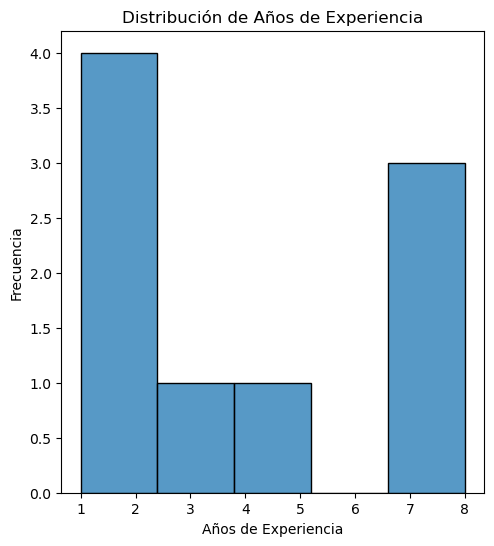

In [80]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_employee['Years'], bins=5, kde=False)
plt.title('Distribución de Años de Experiencia')
plt.xlabel('Años de Experiencia')
plt.ylabel('Frecuencia')
plt.show()

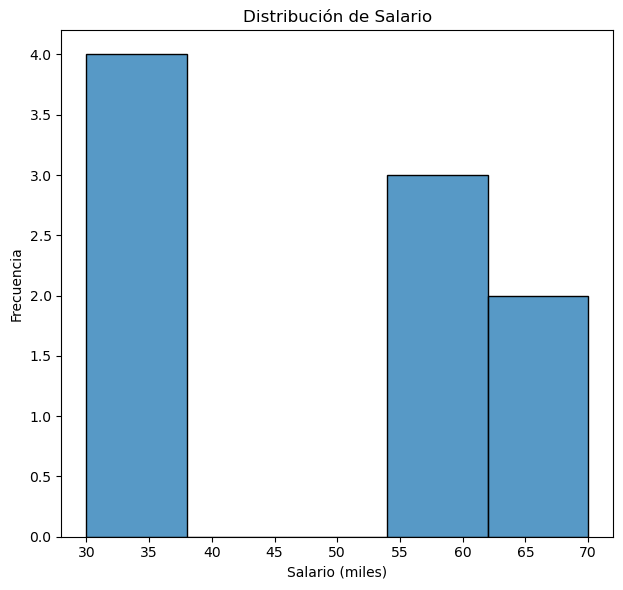

In [82]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
sns.histplot(df_employee['Salary'], bins=5, kde=False)
plt.title('Distribución de Salario')
plt.xlabel('Salario (miles)')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

#### ¿Cuál es el salario medio en esta empresa?

In [84]:
df_employee["Salary"].mean()

48.888888888888886

#### ¿Cuál es el salario más alto?

In [86]:
df_employee["Salary"].max()

70

#### ¿Cuál es el salario más bajo?

In [88]:
df_employee_min = df_employee["Salary"].min()
df_employee_min

30

#### ¿Quiénes son los empleados con el salario más bajo?

In [90]:
df_employee["Name"][df_employee["Salary"] == df_employee_min]

1    Maria
2    David
Name: Name, dtype: object

#### ¿Podría darnos toda la información sobre un empleado llamado David?

In [92]:
df_employee[df_employee["Name"] == "David"]

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### ¿Podría dar sólo el sueldo de David?

In [94]:
df_employee["Salary"][df_employee["Name"] == "David"]

2    30
Name: Salary, dtype: int64

#### Printea todas las líneas en las que el cargo es asociado

In [96]:
df_employee[df_employee["Title"] == "associate"]

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Printea las 3 primeras filas de tu dataframe

##### Consejo : Hay 2 maneras de hacerlo. Hazlo de las dos maneras

In [98]:
df_employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [100]:
df_employee[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### ¿Encuentra a los empleados cuyo cargo es asociado y cuyo salario es superior a 55?

In [102]:
df_employee[(df_employee["Title"] == "associate") & (df_employee["Salary"] > 55)]

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Agrupa a los empleados en función del número de años que llevan trabajando. ¿Cuáles son los salarios medios de cada grupo?

In [104]:
df_employee.groupby("Years")["Salary"].mean()

Years
1    35.000000
2    38.333333
3    55.000000
4    35.000000
7    60.000000
8    70.000000
Name: Salary, dtype: float64

#### ¿Cuál es el salario medio por título?

In [106]:
df_employee.groupby("Title")["Salary"].mean()

Title
VP           70.000000
analyst      32.500000
associate    56.666667
Name: Salary, dtype: float64

#### Muestra un resumen visual de los datos utilizando boxplot. ¿Cuáles son los cuartiles primero y tercero? Comenta tus resultados.

* Pista : Cuantiles vs Cuartiles*.
En Probabilidad y Estadística, los cuantiles son puntos de corte que dividen el rango de una distribución de probabilidad en intervalos continuos con probabilidades iguales. Cuando la división es en cuatro partes, los valores de la variable correspondientes al 25%, 50% y 75% de la distribución total se denominan cuartiles.

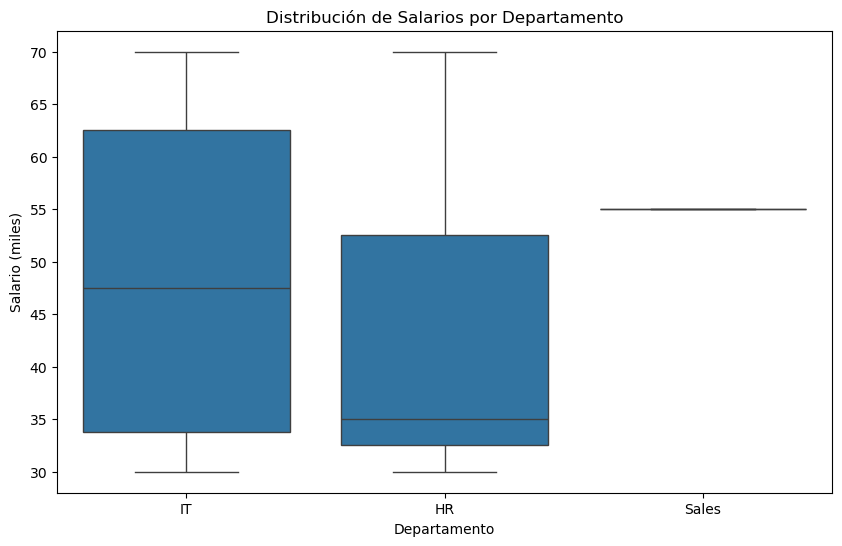

In [108]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Department', y='Salary', data=df_employee)
plt.title('Distribución de Salarios por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Salario (miles)')
plt.show()

#### ¿Es diferente el salario medio por género?

In [110]:
df_employee.groupby("Gender")["Salary"].mean()

Gender
F    47.5
M    50.0
Name: Salary, dtype: float64

#### Encuentra el mínimo, la media y el máximo de todas las columnas numéricas para cada Departamento.

##### Sugerencia: Utiliza las funciones de la lección Manipulación de Datos

In [112]:
print(df_employee.groupby("Department").agg({"Years":"min", "Salary":"min"}))
print(df_employee.groupby("Department").agg({"Years":"max", "Salary":"max"}))
print(df_employee.groupby("Department").agg({"Years":"mean", "Salary":"mean"}))

            Years  Salary
Department               
HR              2      30
IT              1      30
Sales           2      55
            Years  Salary
Department               
HR              8      70
IT              8      70
Sales           3      55
               Years  Salary
Department                  
HR          4.666667   45.00
IT          4.500000   48.75
Sales       2.500000   55.00


### Pregunta bonus

#### Para cada departamento, calcule la diferencia entre el salario máximo y el salario mínimo.

##### * Sugerencia: pruebe a utilizar `agg` o `apply` y `lambda`*.

In [115]:
df_employee.groupby("Department")["Salary"].max()-df_employee.groupby("Department")["Salary"].min()

Department
HR       40
IT       40
Sales     0
Name: Salary, dtype: int64

# Desafío 3

#### Abra el conjunto de datos Orders.csv. Nombre el conjunto de datos pedidos

In [117]:
df_orders = pd.read_csv("Orders.csv")
df_orders

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397919,541904,581587,22613,2011,12,5,12,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680,France,10.20
397920,541905,581587,22899,2011,12,5,12,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680,France,12.60
397921,541906,581587,23254,2011,12,5,12,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680,France,16.60
397922,541907,581587,23255,2011,12,5,12,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680,France,16.60


#### Explore su conjunto de datos observando los tipos de datos y las estadísticas de resumen. Comenta tus resultados

In [119]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    397924 non-null  int64  
 1   InvoiceNo     397924 non-null  int64  
 2   StockCode     397924 non-null  object 
 3   year          397924 non-null  int64  
 4   month         397924 non-null  int64  
 5   day           397924 non-null  int64  
 6   hour          397924 non-null  int64  
 7   Description   397924 non-null  object 
 8   Quantity      397924 non-null  int64  
 9   InvoiceDate   397924 non-null  object 
 10  UnitPrice     397924 non-null  float64
 11  CustomerID    397924 non-null  int64  
 12  Country       397924 non-null  object 
 13  amount_spent  397924 non-null  float64
dtypes: float64(2), int64(8), object(4)
memory usage: 42.5+ MB


In [121]:
df_orders.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


#### ¿Cuál es el precio medio de compra?

In [123]:
df_orders["amount_spent"].mean()

22.394748504739596

#### ¿Cuáles fueron los precios de compra más altos y más bajos? 

In [126]:
df_orders["UnitPrice"].max()

8142.75

In [128]:
df_orders["UnitPrice"].min()

0.0

#### Seleccione todos los clientes que tenemos en España

In [131]:
df_orders[df_orders["Country"] == "Spain"]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394733,535271,581193,23291,2011,12,3,17,dolly girl childrens cup,2,2011-12-07 17:05:00,1.25,17097,Spain,2.50
394734,535272,581193,85232D,2011,12,3,17,set/3 decoupage stacking tins,1,2011-12-07 17:05:00,4.95,17097,Spain,4.95
394735,535273,581193,22721,2011,12,3,17,set of 3 cake tins sketchbook,2,2011-12-07 17:05:00,1.95,17097,Spain,3.90
394736,535274,581193,23241,2011,12,3,17,treasure tin gymkhana design,1,2011-12-07 17:05:00,2.08,17097,Spain,2.08


#### ¿Cuántos clientes tenemos en España?
##### Pista : Utiliza value_counts()

In [134]:
df_orders[df_orders["Country"] == "Spain"].value_counts()

Unnamed: 0  InvoiceNo  StockCode  year  month  day  hour  Description                      Quantity  InvoiceDate          UnitPrice  CustomerID  Country  amount_spent
6421        536944     22383      2010  12     5    12    lunch bag suki  design           70        2010-12-03 12:20:00  1.65       12557       Spain    115.50          1
347861      567340     21164      2011  9      1    15    home sweet home metal sign       6         2011-09-19 15:02:00  2.95       12540       Spain    17.70           1
347854      567340     21172      2011  9      1    15    party metal sign                 12        2011-09-19 15:02:00  1.45       12540       Spain    17.40           1
347855      567340     22176      2011  9      1    15    blue owl soft toy                12        2011-09-19 15:02:00  2.95       12540       Spain    35.40           1
347856      567340     23393      2011  9      1    15    home sweet home cushion cover    8         2011-09-19 15:02:00  3.75       12540       

#### Selecciona todos los clientes que han comprado más de 50 artículos ?

In [137]:
df_orders[df_orders["Quantity"] > 50]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
46,46,536371,22086,2010,12,3,9,paper chain kit 50's christmas,80,2010-12-01 09:00:00,2.55,13748,United Kingdom,204.00
83,83,536376,21733,2010,12,3,9,red hanging heart t-light holder,64,2010-12-01 09:32:00,2.55,15291,United Kingdom,163.20
96,96,536378,21212,2010,12,3,9,pack of 72 retrospot cake cases,120,2010-12-01 09:37:00,0.42,14688,United Kingdom,50.40
102,102,536378,85071B,2010,12,3,9,red charlie+lola personal doorsign,96,2010-12-01 09:37:00,0.38,14688,United Kingdom,36.48
174,176,536386,85099C,2010,12,3,9,jumbo bag baroque black white,100,2010-12-01 09:57:00,1.65,16029,United Kingdom,165.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397720,541702,581566,23404,2011,12,5,11,home sweet home blackboard,144,2011-12-09 11:50:00,3.26,18102,United Kingdom,469.44
397721,541703,581567,21417,2011,12,5,11,cockle shell dish,84,2011-12-09 11:56:00,0.79,16626,United Kingdom,66.36
397729,541711,581567,21326,2011,12,5,11,aged glass silver t-light holder,144,2011-12-09 11:56:00,0.55,16626,United Kingdom,79.20
397761,541746,581571,23167,2011,12,5,12,small ceramic top storage jar,96,2011-12-09 12:00:00,0.69,15311,United Kingdom,66.24


#### Selecciona pedidos de España superiores a 50 artículos

In [149]:
df_orders[(df_orders["Country"] == "Spain") & (df_orders["Quantity"] > 50)]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
32454,52416,540785,84997B,2011,1,2,11,red 3 piece retrospot cutlery set,144,2011-01-11 11:39:00,3.39,12557,Spain,488.16
32455,52417,540785,84997D,2011,1,2,11,pink 3 piece polkadot cutlery set,360,2011-01-11 11:39:00,3.39,12557,Spain,1220.40
32456,52418,540785,84997C,2011,1,2,11,blue 3 piece polkadot cutlery set,360,2011-01-11 11:39:00,3.39,12557,Spain,1220.40
32457,52419,540785,84997A,2011,1,2,11,green 3 piece polkadot cutlery set,144,2011-01-11 11:39:00,3.39,12557,Spain,488.16
91155,136767,547972,22383,2011,3,1,16,lunch bag suki design,150,2011-03-28 16:41:00,1.45,12557,Spain,217.50


#### Seleccionar todos los pedidos gratuitos

In [151]:
df_orders[df_orders["UnitPrice"] == 0]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
34494,56674,541109,22168,2011,1,4,15,organiser wood antique white,1,2011-01-13 15:10:00,0.0,15107,United Kingdom,0.0
53788,86789,543599,84535B,2011,2,4,13,fairy cakes notebook a6 size,16,2011-02-10 13:08:00,0.0,17560,United Kingdom,0.0
85671,130188,547417,22062,2011,3,3,10,ceramic bowl with love heart design,36,2011-03-23 10:25:00,0.0,13239,United Kingdom,0.0
92875,139453,548318,22055,2011,3,3,12,mini cake stand hanging strawbery,5,2011-03-30 12:45:00,0.0,13113,United Kingdom,0.0
97430,145208,548871,22162,2011,4,1,14,heart garland rustic padded,2,2011-04-04 14:42:00,0.0,14410,United Kingdom,0.0


#### Seleccionar todos los pedidos que sean 'lunch bag
#### Pista: Utilice las funciones de cadena

In [159]:
df_orders[df_orders['Description'].str.contains("lunch bag")]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Seleccione todos los pedidos realizados en 2011 y que sean «lunch bag».  

In [161]:
df_orders[(df_orders['Description'].str.contains("lunch bag")) & (df_orders["year"] == 2011) ]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
26860,43616,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Muestra la distribución de frecuencias del importe gastado en España.

In [179]:
df_spain = df_orders[df_orders["Country"] == "Spain"]
frequency_distribution = df_spain["amount_spent"].value_counts().sort_index()
print(frequency_distribution)

amount_spent
0.00       1
0.21       3
0.29       1
0.39       3
0.42       1
          ..
417.50     1
488.16     2
1080.00    1
1220.40    2
1350.00    3
Name: count, Length: 316, dtype: int64


#### Seleccione todos los pedidos realizados en el mes de agosto

In [167]:
df_orders[df_orders["month"] == 8]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226483,320688,565067,22644,2011,8,3,17,ceramic cherry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226484,320689,565067,22645,2011,8,3,17,ceramic heart fairy cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226485,320690,565067,22637,2011,8,3,17,piggy bank retrospot,2,2011-08-31 17:16:00,2.55,15856,United Kingdom,5.10
226486,320691,565067,22646,2011,8,3,17,ceramic strawberry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90


#### Seleccione cuántos pedidos se realizan por países en el mes de agosto
##### Pista: Utilice value_counts()

In [173]:
df_orders[df_orders["month"] == 8].groupby("Country").size()

Country
Australia            107
Austria               88
Belgium              194
Canada                 5
Channel Islands      140
Denmark               16
EIRE                 593
Finland               61
France               569
Germany              795
Iceland               22
Israel               171
Italy                 95
Malta                 55
Netherlands          280
Norway                77
Poland                17
Portugal              41
Spain                252
Sweden                40
Switzerland          267
United Kingdom     23105
Unspecified           23
dtype: int64

#### ¿Cuál es el gasto medio por país?

In [177]:
df_orders.groupby("Country")["amount_spent"].mean()

Country
Australia               116.895620
Austria                  25.624824
Bahrain                  32.258824
Belgium                  20.283772
Brazil                   35.737500
Canada                   24.280662
Channel Islands          27.340160
Cyprus                   22.134169
Czech Republic           33.069600
Denmark                  49.882474
EIRE                     36.687745
European Community       21.670833
Finland                  32.913985
France                   25.056827
Germany                  25.311562
Greece                   32.831172
Iceland                  23.681319
Israel                   29.119718
Italy                    23.064960
Japan                   116.561900
Lebanon                  37.641778
Lithuania                47.458857
Malta                    24.335625
Netherlands             120.798282
Norway                   33.736418
Poland                   22.226212
Portugal                 22.872702
RSA                      17.281207
Saudi Arabia

#### ¿Cuál es el artículo más caro?

In [201]:
df_orders[df_orders["UnitPrice"] == df_orders["UnitPrice"].max()]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
118352,173382,551697,POST,2011,5,2,13,postage,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom,8142.75


#### ¿Cuál fue la cantidad media gastada al año?

In [209]:
df_orders.groupby("amount_spent")["year"].mean()

amount_spent
0.000         2010.925
0.001         2011.000
0.060         2011.000
0.080         2011.000
0.100         2011.000
                ...   
7144.720      2011.000
8142.750      2011.000
38970.000     2011.000
77183.600     2011.000
168469.600    2011.000
Name: year, Length: 2811, dtype: float64